    
# ECON320-3 Assignment 8: James (Minkyu) Song


In [ ]:
# Script name: james_song_assignment_08.ipynb
# Purpose of script: Assignment 8 of ECON320 with Dr.O'Connell
# Author: James (Minkyu) Song
# Date Created: October 31st 2022
# --------------------------
# Notes: NA
# ---------------------------


# Assignment 8

## Part I

* Objective: Simulate data with correlated X's in MLRM, draw 1,000 random samples, and generate sample estimates, show sampling distribution of the estimated parameter, and show bias in the estimates.*

* Reference: Wooldridge (7th edition), Chapter 3, Section 3*

Perform a data generating process of $$y = \beta_0 + \beta_1 * x_1 +  \beta_2 * x_2 + u$$ where $\beta_0$ is the sum of the 3rd and 4th digits of your birthday, $\beta_1$ is the sum of the 1st and second digits of your birthday, $\beta_2$ is the sum of the 5th and 6th digits of your birthday, $x_1$ is distributed normal with mean of 10 and with variance of the first non-zero digit of your birthday, and U is (independently) distributed normal with mean 0 and variance of the last non-zero digit of your birthday, and $x_2$ has its own (intermediate step) data generating process, given by: $$x_{2i} = \alpha_0 + \alpha_1 * x_{1i} + \mu_i$$

Where $\alpha_0 = 2$, $\alpha_1=.8$ and $\mu_i \sim N(0,1)$.

Perform this process for a "population" of 1 million observations.

a. What is the covariance of $x_1$ and $x_2$ in the population data? Save this into an object called "covX1X2".


In [1]:
# I have set up a library (folder) where there are functions that are often reused for this ECON320 class.
# This library will be subject to change as the course progresses.
# below is the link for reference.
# https://github.com/mkjames98/college_courses/tree/main/ECON320_lib

from ECON320_lib import birthday_dgm, rm_components
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
birthday_string = "18062000" # using the birthday string as rng
rng = np.random.RandomState(int(birthday_string))
#birthday_string, rng, x_mean, u_mean, size
x1_mean = 10
u_mean = 0
x2_alpha0 = 2
x2_alpha1 = 0.8
x2_resid_mean = 0
x2_resid_var = 1
# created a new function for this custom dgm
# it can be viewed on my github or below cell as a comment
df, pop_beta0, pop_beta1, pop_beta2 = birthday_dgm.generate_mrm_dynamic_birthday(birthday_string, rng, x1_mean, u_mean, x2_alpha0, x2_alpha1, x2_resid_mean, x2_resid_var, size = 100_000)
# dgm is complete

x_1 is normally distributed with a mean of 10 and variance of 1
x_2 is normally distributed with a mean of 9.9998483844019 and variance of 1.652
u is normally distributed with a mean of 0 and variance of 2
y = 6 + 9*x_1 + 2*x_2 + u 


In [3]:
# functions in the ECON320_lib folder
# def birthday_str_variance_srm(birthday_string):
#     for b in list(birthday_string):
#         if b != "0":
#             var_x = int(b)
#             break
#     for revb in reversed(list(birthday_string)):
#         if revb != "0":
#             var_u = int(revb)
#             break
#     return var_x, var_u
#
# def generate_mrm_dynamic_birthday(
#     birthday_string, rng, x1_mean, u_mean, x2_alpha0, x2_alpha1, x2_resid_mean, x2_resid_var, size
# ):  # x_mean = 10, u_mean =0
#     # beta0 is addition of 3rd and 4th digit of my birthday
#     pop_beta0 = int(birthday_string[2]) + int(birthday_string[3])
#     # beta1 is addition of 1st and 2nd digit of my birthday
#     pop_beta1 = int(birthday_string[0]) + int(birthday_string[1])
#     # beta2 is addition of 5th and 6th digit of my birthday
#     pop_beta2 = int(birthday_string[4]) + int(birthday_string[5])
#
#     # set scale, scale should be std, so sqrt the result
#     var_x1, var_u = birthday_str_variance_srm(birthday_string)
#     scale_x1 = math.sqrt(var_x1)
#     scale_u = math.sqrt(var_u)
#
#     x_1 = rng.normal(loc=x1_mean, scale=scale_x1, size=size)
#     print(
#         f"x_1 is normally distributed with a mean of {x1_mean} and variance of {round(var_x1,3)}"
#     )
#     u = rng.normal(loc=u_mean, scale=scale_u, size=size)
#
#     x_2 = []
#     scale_u2 = math.sqrt(x2_resid_var)
#     u_x2 = rng.normal(loc=x2_resid_mean, scale=scale_u2, size=size)
#     # x2i = alpha0 + alpha1 * x1i +ui
#     for i, x1_i in enumerate(x_1): # using enum to reference u_i's
#         x2_i = x2_alpha0 + x2_alpha1 * x1_i + u_x2[i]
#         x_2.append(x2_i)
#     x_2 = np.array(x_2)
#
#     print(
#         f"x_2 is normally distributed with a mean of {np.mean(x_2)} and variance of {round(np.var(x_2), 3)}"
#     )
#     print(
#         f"u is normally distributed with a mean of {u_mean} and variance of {round(var_u, 3)}"
#     )
#     y = pop_beta0 + pop_beta1 * x_1 + pop_beta2 * x_2 + u
#     print(f"y = {int(pop_beta0)} + {int(pop_beta1)}*x_1 + {int(pop_beta2)}*x_2 + u ")
#     gdata = {"x_1": x_1, "x_2": x_2, "u": u, "y": y}
#     df = pd.DataFrame(data=gdata)
#     return df, pop_beta0, pop_beta1, pop_beta2


In [4]:
df.head()

,x_1,x_2,u,y
0,8.521474,10.126174,0.620051,103.565668
1,9.420671,9.595559,-1.610882,108.366272
2,8.327921,10.121149,-0.101887,101.091703
3,10.154776,9.666038,-0.249930,116.475125
4,10.799562,8.504482,-1.468527,118.736499


In [5]:
covX1X2 = np.cov(df['x_1'], df['x_2'])[1, 0]
print("The Covariance between x1 and x2 is: ", covX1X2)

The Covariance between x1 and x2 is:  0.8070680212193647


b. Based on the setup above, what is the theoretical total sum of squares of $x_1$ in a sample of 1,000 observations? Calculate this and save it into an object called "TSSx1".


In [6]:
sample_df = df.sample(n= 1_000, random_state = int(birthday_string)) # taking 1_000 sample
sample_x1_mean = np.mean(sample_df["x_1"]) # taking the mean
TSSx1=((sample_df['x_1']-sample_x1_mean)**2).sum()
TSSx1

1017.1523555810531


c. Draw a single random sample of 1,000 observations from the population data. From the sample drawn for (b), estimate the parameters of an underspecified sample regression function given by  $$y_i = \tilde{\beta_0} + \tilde{\beta_1} * x_1 + \tilde{u_i}$$


In [7]:
reg_us = smf.ols(formula= 'y ~ x_1', data= sample_df)
result_us = reg_us.fit()
sample_us_b0 = result_us.params['Intercept']
sample_us_b1 = result_us.params['x_1']
print("the sample beta_0 of an underspecified model is: ", sample_us_b0)
print("the sample beta_1 of an underspecified model is: ", sample_us_b1)

the sample beta_0 of an underspecified model is:  10.403477085881399
the sample beta_1 of an underspecified model is:  10.55958989295798



d. What is $\tilde{\beta_1}$ and how does it compare to $\beta_1$?



In [8]:
print("beta_1_tilde is:       ", sample_us_b1)
print("population beta_1 is:  ", pop_beta1)
print("the difference is:     ", np.abs(pop_beta1-sample_us_b1))

print("beta_1_tilde is greater than population beta_1")

beta_1_tilde is:        10.55958989295798
population beta_1 is:   9
the difference is:      1.5595898929579803
beta_1_tilde is greater than population beta_1


e. From the sample drawn for (b), estimate the parameters of a properly specified sample regression function given by  $$y_i = \hat{\beta_0} + \hat{\beta_1} * x_{1i} + \hat{\beta_2} * x_{2i} + \hat{u_i}$$ How does $\hat{\beta_1}$ compare to $\tilde{\beta_1}$ and $\beta_1$?


In [9]:
reg = smf.ols(formula= 'y ~ x_1 + x_2', data= sample_df)
result = reg.fit()
sample_b0_hat = result.params['Intercept']
sample_b1_hat = result.params['x_1']
sample_b2_hat = result.params['x_2']

print(sample_b0_hat)
print(sample_b1_hat)
print(sample_b2_hat)

5.9909946769064195
8.98390274840577
2.013280447635859



f. Repeat steps (b) and (c) 1,000 times, and save the estimated parameter $\tilde{\beta_1}$ from each draw into an object.


In [10]:
estimated_param_b1_tilde = []
for i in range(1, 1_001):
    sample_loop_df = df.sample(n= 1_000, random_state = int(birthday_string)+i)
    result_us_loop = smf.ols(formula= 'y ~ x_1', data= sample_loop_df).fit()
    sample_us_b1_tide = result_us_loop.params['x_1']
    estimated_param_b1_tilde.append(sample_us_b1_tide)


g. Present a histogram of the sampling distribution of $\tilde{\beta_1}$ from (e). What is the mean of the distribution of $\tilde{\beta_1}$ and what is its difference from $\beta_1$?

The distribution is plotted below.
Figure 1:


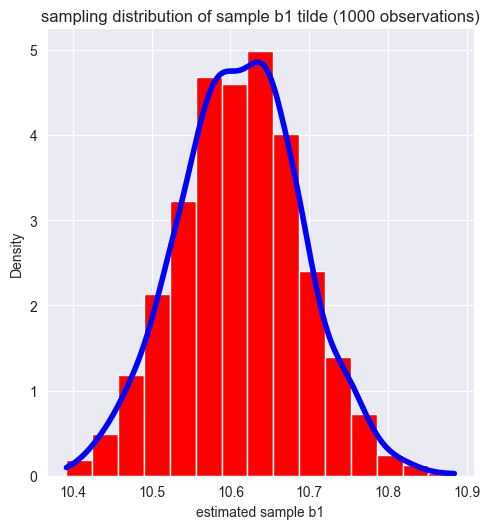

With the seed set to my birthday,
the mean of the distribution is :             10.61235379949558
the difference between beta1_tilde, beta1 is:  1.6123537994955797


In [11]:
sample_b1_distribution_plot = sns.displot(
    data= estimated_param_b1_tilde,
    bins=15,
    stat="density",
    kde=True,
    color="blue",
    line_kws={"lw": 4},
    facecolor="red",
    edgecolor="white",
    kind="hist",
)

plt.xlabel("estimated sample b1")
plt.title("sampling distribution of sample b1 tilde (1000 observations)")
print("The distribution is plotted below.")
print("Figure 1:")
plt.show()

mean_dist = np.mean(estimated_param_b1_tilde)
dist_diffs = mean_dist - pop_beta1

print("With the seed set to my birthday,")
print("the mean of the distribution is :            ", mean_dist)

print("the difference between beta1_tilde, beta1 is: ", dist_diffs)

h. From (a) and (b) above, what is the difference you would expect to see in (g)?

In [12]:
var_x1 = TSSx1/(len(sample_df)-1) # getting variance using the corresponding df's length -1 = n -1

In [13]:
estimated_b1_hat = pop_beta1+pop_beta2*(covX1X2/var_x1) # by E[b1_hat]= b1+b2*E(cov(x1,x2)/var)

estimated_difference_ab_1 = estimated_b1_hat- pop_beta1 # by algebra
estimated_difference_ab_2 = pop_beta2*(covX1X2/var_x1) # also by algebra

if round(estimated_difference_ab_1, 3) == round(estimated_difference_ab_2, 3):
    print("the estimated difference in (g) from (a) and (b) is: ", estimated_difference_ab_1)
    print("by under specifying the model there was a positive variance in b_1_tilde")

the estimated difference in (g) from (a) and (b) is:  1.5853297665275825
by under specifying the model there was a positive variance in b_1_tilde
